# Administrative



## VPN to access cuda computers
zeus.informatik.uni-bonn.de

# Classification Loss
<img src=loss.png>

### A generalization of binary SVM
### It is scale free
<img src=loss1.png>

<img src=loss2.png>

<img src=loss3.png>

<img src=loss4.png>

## The result is 12.9!

<img src=loss5.png>

## The result is (2.9+0+12.9)/3. ==> 5.26

<img src=loss6.png>

<img src=loss7.png>

## Squared Hinge Loss
<img src=loss8.png>

<img src=loss9.png>

## For 2 classes it will be Binary SVM
<img src=loss10.png>

<img src=loss11.png>

<img src=loss12.png>

<img src=loss13.png>

<img src=loss14.png>

<img src=loss15.png>

<img src=loss16.png>

<img src=loss17.png>

<img src=loss18.png>

<img src=loss19.png>

<img src=loss20.png>

<img src=loss21.png>

<img src=loss22.png>

----------
## Doing a log transform converts these small numbers to larger negative values which a finite precision machine can handle better.
<img src=loss23.png>

<img src=loss24.png>

<img src=loss25.png>

<img src=loss26.png>

<img src=loss27.png>

<img src=loss28.png>

<img src=loss29.png>

### 0 -> 1 -> -log(1/N)

<img src=loss30.png>

<img src=loss31.png>

<img src=loss32.png>

# Multi-layer Perceptron

• Theoretical reference
– http://www.deeplearningbook.org/contents/mlp.html


<img src=Refresher1.jpg>
<img src=Refresher2.jpg>
<img src=Refresher3.jpg>
<img src=Refresher4.jpg>

# Why do we normalize our input?
- We want to prevent our parameters from going very big or very small
- Finding initial condition is easier

In [3]:
a=1000000000
for i in range(1000000):
    a = a +1e-6
print(a-1000000000)

0.95367431640625


## MNIST handwritten digits classification with MLPs

In this notebook, we'll train a multi-layer perceptron model to classify MNIST digits using **PyTorch**. 

First, the needed imports. 

In [5]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', cuda)

torch.manual_seed(42)
if cuda:
    torch.cuda.manual_seed(42)

Using PyTorch version: 1.0.1.post2 CUDA: True


## Data

Next we'll load the MNIST data.  First time we may have to download the data, which can take a while.

In [27]:
batch_size = 32

kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0,), (1,))
                   ])),
    batch_size=batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0,), (1,))
                   ])),
    batch_size=batch_size, shuffle=True, **kwargs)

In [28]:
list(train_loader)[0][0].min()

tensor(0.)

The train and test data are provided via data loaders that provide iterators over the datasets. The first element of training data (`X_train`) is a 4th-order tensor of size (`batch_size`, 1, 28, 28), i.e. it consists of a batch of images of size 1x28x28 pixels. `y_train` is a vector containing the correct classes ("0", "1", ..., "9") for each training digit.

In [29]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


Here are the first 10 training digits:

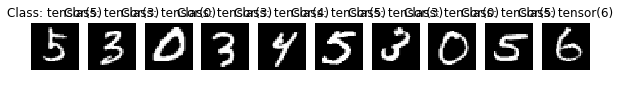

In [30]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28), cmap="gray")
    plt.title('Class: '+str(y_train[i]))

## MLP network definition

Let's define the network as a Python class.  We have to write the `__init__()` and `forward()` methods, and PyTorch will automatically generate a `backward()` method for computing the gradients for the backward pass.

Finally, we define an optimizer to update the model parameters based on the computed gradients.  We select *stochastic gradient descent (with momentum)* as the optimization algorithm, and set *learning rate* to 0.01.  Note that there are [several different options](http://pytorch.org/docs/optim.html#algorithms) for the optimizer in PyTorch that we could use instead of *SGD*.

### PyTorch's `nn.CrossEntropyLoss` actually takes logits (it applies both log_softmax + NLL loss).

## Be aware of weight: If provided, the optional argument weight should be a 1D Tensor assigning weight to each of the classes. This is particularly useful when you have an unbalanced training set.

## read: https://zhang-yang.medium.com/understanding-cross-entropy-implementation-in-pytorch-softmax-log-softmax-nll-cross-entropy-416a2b200e34

In [69]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 50)
        self.fc1_drop = nn.Dropout(0.2)#What does it do?
        self.fc2 = nn.Linear(50, 50)
        self.fc2_drop = nn.Dropout(0.2)
        self.fc3 = nn.Linear(50, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.fc1_drop(x)
        x = F.relu(self.fc2(x))
        x = self.fc2_drop(x)
        return F.log_softmax(self.fc3(x),dim=1)

model = Net()
if cuda:
    model.cuda()
    
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)#What is SGD stans for?

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.2)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc2_drop): Dropout(p=0.2)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
)


## Learning

Let's now define functions to `train()` and `test()` the model. 

In [70]:
def train(epoch, log_interval=100):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if cuda:
            data, target = data.cuda(), target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * float(batch_idx) / len(train_loader), loss.item()))

In [71]:
def test(loss_vector, accuracy_vector):
    model.eval()
    test_loss, correct = 0, 0
    for data, target in test_loader:
        if cuda:
            data, target = data.cuda(), target.cuda()
        data.requires_grad_(False)#We use to use Volatile!
        target.requires_grad_(False)
        output = model(data)
        test_loss += F.nll_loss(output, target).item()
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum().float()
    
    test_loss /= len(test_loader)
    loss_vector.append(test_loss)
    
    accuracy = 100. * correct / float(len(test_loader.dataset))
    accuracy_vector.append(accuracy)
    
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), float(accuracy)))

Now we are ready to train our model using the `train()` function.  An *epoch* means one pass through the whole training data. After each epoch, we evaluate the model using `test()`. 

In [72]:
%%time
epochs = 10

lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    test(lossv, accv)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.306923
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.278215
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.115098
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.654518
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.740354
Train Epoch: 1 [16000/60000 (27%)]	Loss: 1.123263
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.955765
Train Epoch: 1 [22400/60000 (37%)]	Loss: 1.028746
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.911017
Train Epoch: 1 [28800/60000 (48%)]	Loss: 0.535645
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.899131
Train Epoch: 1 [35200/60000 (59%)]	Loss: 0.652807
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.506397
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.577208
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.473050
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.493516
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.428644
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.443555
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.380243

Test set: Average loss: 0.3795, Accuracy: 8934.0/10000 (89

Let's now visualize how the training progressed. 

* *Loss* is a function of the difference of the network output and the target values.  We are minimizing the loss function during training so it should decrease over time.
* *Accuracy* is the classification accuracy for the test data.

[tensor(89.3400), tensor(91.7400), tensor(93.3500), tensor(94.1600), tensor(94.9100), tensor(95.3700), tensor(95.5700), tensor(95.9700), tensor(96.2700), tensor(96.1700)]


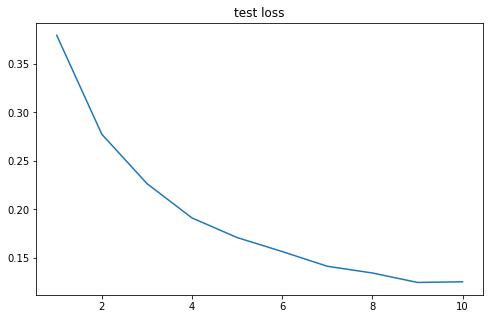

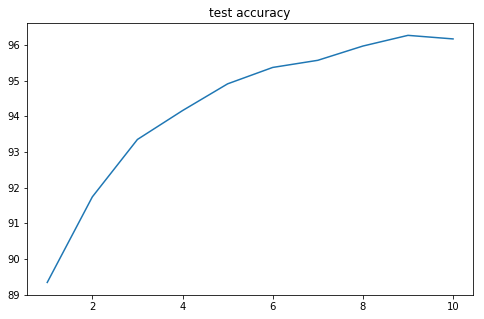

In [73]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,epochs+1), lossv)
plt.title('test loss')

plt.figure(figsize=(8,5))
plt.plot(np.arange(1,epochs+1), accv)
plt.title('test accuracy');
print(accv)

## Introduce Pytorch lightning : https://github.com/PyTorchLightning/pytorch-lightning
## Dataloader : https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
## tensorboard :  https://www.tensorflow.org/tensorboard

# Load and save model
There are two main approaches for serializing and restoring a model.

The first (recommended) saves and loads only the model parameters:

In [36]:
torch.save(model.state_dict(), "model.th")

Then later:

In [37]:
the_model = Net()
the_model.load_state_dict(torch.load("model.th"))
print(the_model)

Net(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.2)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc2_drop): Dropout(p=0.2)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
)


The second saves and loads the entire model:

In [38]:
torch.save(model, "model.th.2")

/home/hafez/anaconda3/lib/python3.6/site-packages/torch/serialization.py:251: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Then later:

In [39]:
the_model2 = torch.load("model.th.2")
print(the_model2)

Net(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.2)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc2_drop): Dropout(p=0.2)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
)


However in this case, the serialized data is bound to the specific classes and the exact directory structure used, so it can break in various ways when used in other projects, or after some serious refactors.

# Whats wrong with stacking FC?
- Number of parameters
- Structure of data
- Overfitting

# Assignment3
- Add regularization to your CFAR-10 model (Dropout, L1, and L2)
- Find out how deep the model can be and still improving
- Draw confusion matrix
- Use five different optimizers and compare their results and convergence time (SGD, Adam, Adagrad, Adadelta, RMSprop)
- Use three different activation functions (ReLu, Tanh, Sigmoid)
- Draw all of your experiments in tensorboard or wandb!
- Write softmax loss and Hinge loss without using torch.nn

## Refrences:
### CS231n Standford
### Pytorch Documents
### https://www.udemy.com/course/practical-deep-learning-with-pytorch/